In [3]:
import openai 
from dotenv import load_dotenv
import json
from langchain_community.utilities import GoogleSearchAPIWrapper
import os
from langchain.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI
from pydantic import BaseModel, Field
from langchain.utils.openai_functions import convert_pydantic_to_openai_function
from langchain_core.tools import Tool
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from collections import Counter
import pandas as pd

def read_json(json_file):
    with open(json_file, 'r') as f:
        data = json.load(f)
    return data

dotenv_path = os.path.join('..', '.env')
load_dotenv(dotenv_path)
openai.api_key = os.environ['OPENAI_API_KEY']
root_dir = '../db/20240802'
job_data = read_json(os.path.join(root_dir,'jobs_merge.json'))

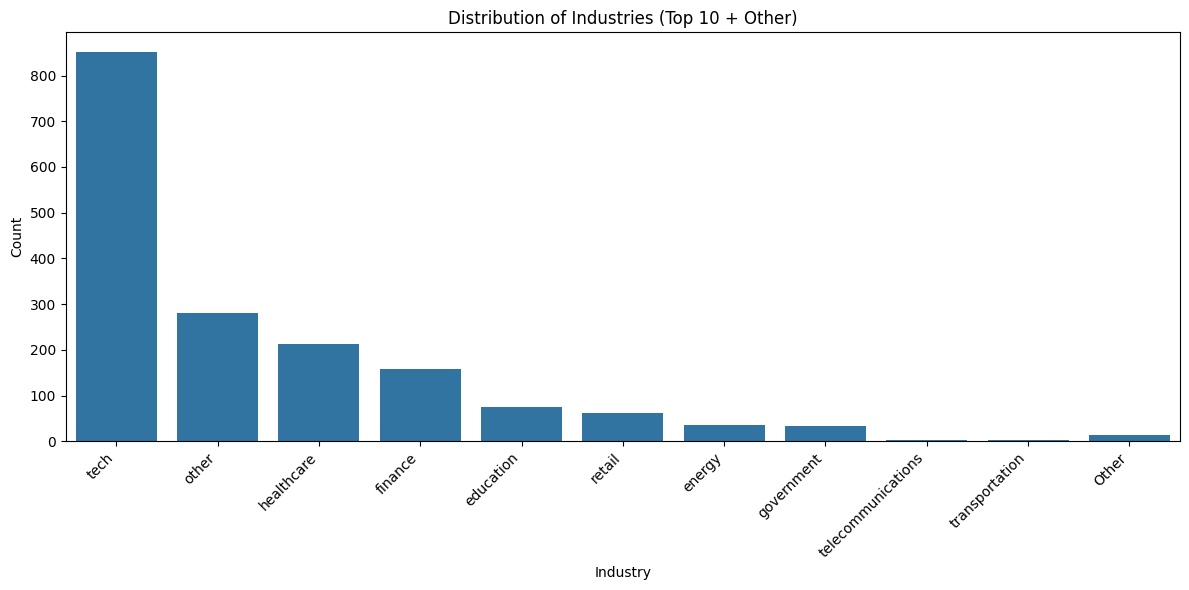

In [4]:
industry = []
for job in job_data:
    industry.append(job['industry'])



# Count the frequencies of each industry
industry_counts = Counter(industry)

# Create a DataFrame from the counts
df = pd.DataFrame.from_dict(industry_counts, orient='index', columns=['count']).reset_index()
df = df.rename(columns={'index': 'industry'})
df = df.sort_values('count', ascending=False)

# Get the top 10 industries
top_10 = df.nlargest(10, 'count')

# Sum the counts of the remaining industries
other_count = df.iloc[10:]['count'].sum()

# Add the "Other" category
other = pd.DataFrame({'industry': ['Other'], 'count': [other_count]})

# Combine top 10 and Other
df_plot = pd.concat([top_10, other])

# Create the bar chart using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='industry', y='count', data=df_plot)
plt.title('Distribution of Industries (Top 10 + Other)')
plt.xlabel('Industry')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()

In [13]:
# print certain industries
for job in job_data:
    if job['industry'] == 'retail':
        print(20*'-')
        print(job['name'])
        print(job['company_url'])


--------------------
SHEIN Technology LLC
http://www.sheingroup.com
--------------------
Amazon Business
https://www.amazonbusiness.com/linkedin
--------------------
Whatnot
http://www.whatnot.com
--------------------
Colgate-Palmolive
http://www.colgatepalmolive.com
--------------------
US LBM Holdings
http://www.uslbm.com
--------------------
Instacart
https://www.instacart.com
--------------------
DICK'S Sporting Goods
http://www.dickssportinggoods.jobs
--------------------
Walmart
https://www.walmart.com
--------------------
Veho
http://shipveho.com/
--------------------
Alex&Co.
http://alexandcompany.com
--------------------
Artisan
https://artisan34.com/
--------------------
Faire
https://www.faire.com
--------------------
Wayfair
https://www.wayfair.com
--------------------
Shipt
https://www.shipt.com
--------------------
ThredUp Inc.
http://www.thredup.com
--------------------
Chipotle Mexican Grill
http://www.chipotle.com
--------------------
Hussmann
http://www.hussmann.com
-

In [18]:
# Create DataFrame
df = pd.DataFrame(job_data)

# Save to Excel
excel_file = 'companies_data.xlsx'
df.to_excel(excel_file, index=False)
